In [1]:
%load_ext autoreload
%autoreload 2

import os
NBROOT = os.path.realpath(os.curdir)

In [7]:
# Preamble
import logging
logging.basicConfig(level=logging.DEBUG)
logging.getLogger('PIL').level = logging.INFO # PIL.PngImagePlugin

import os
from os.path import exists, join as pjoin, realpath
from pathlib import Path

from IPython.display import Image as IImage

from src import bbox, gdal_slope_util as S, mbt_util as M, eslope_geo as GY

import sys
sys.path.insert(0, os.path.realpath('../../etopo/src'))
import img_util as G

In [3]:
mbtfold = '../../mapdata/mbtiles/eslo/'
mbtw = '../../slope-ign-alti/alpsc/esloAlpsW.mbtiles'
mbtw1 = mbtfold + 'esloAlpsC.mbtiles'
# mbtwq = mbtfold + 'esloAlpsCq.mbtiles'

In [ ]:

mbtw0 = mbtfold + 'todelete_esloAlpsW0.mbtiles'
M.cut_to_lnglat(mbtw, bb=GY.bbsalp[0], dest=mbtw0)

Backing up dest as: ../../mapdata/mbtiles/eslo/esloAlpsW0.bak.mbtiles
cut_to_lnglat ../../slope-ign-alti/alpsc/esloAlpsW.mbtiles -> ../../mapdata/mbtiles/eslo/esloAlpsW0.mbtiles
9 16 16
z 9: +3 tiles: 264<x<266 325<y<325
z10: no tiles, skipping
z11: no tiles, skipping
z12: no tiles, skipping
z 13: +576 tiles: 4224<x<4271 5200<y<5211
z 14: +2304 tiles: 8448<x<8543 10400<y<10423
z 15: +9216 tiles: 16896<x<17087 20800<y<20847
z 16: +36864 tiles: 33792<x<34175 41600<y<41695
Meta update {'bounds': '5.625,43.58039,7.73438,44.08759',
 'center': '6.67969,43.83399,9',
 'maxzoom': 16,
 'minzoom': 9,
 'type': 'baselayer'}


In [ ]:
M.cut_to_lnglat(mbtw, bb=GY.bbsalp[0], dest=mbtw0)
!ls -l $mbtw0

-rw-r--r-- 1 me me 158138368 févr.  7 19:24 ../../mapdata/mbtiles/esloAlpsW0.mbtiles


In [ ]:
M.cut_to_lnglat(mbtw, bb=GY.bbsalp[1], dest=mbtw1)



zoom = 9 16 ; n = 391698 * 6 kb/tile ; bounds = 5.625,43.58039,6.32813,44.59047 ; center = 5.97656,44.08543,9 ; format = png ; name = alps/esloAlpsW
cut_to_lnglat ../../slope-ign-alti/alpsc/esloAlpsW.mbtiles -> ../../mapdata/mbtiles/eslo/esloAlpsW1.mbtiles
9 16 16
z 9: +18 tiles: 264<x<266 325<y<330
z10: no tiles, skipping
z11: no tiles, skipping
z12: no tiles, skipping
z 13: +4080 tiles: 4224<x<4271 5211<y<5295
z 14: +16224 tiles: 8448<x<8543 10423<y<10591
z 15: +64704 tiles: 16896<x<17087 20847<y<21183
z 16: +258432 tiles: 33792<x<34175 41695<y<42367
Meta update {'bounds': '5.625,43.58039,7.73438,46.55886',
 'center': '6.67969,45.06963,9',
 'maxzoom': 16,
 'minzoom': 9,
 'type': 'baselayer'}


In [ ]:
lng61z11_hyeres = (GY.lng59z10_chambery_toulon + GY.lng63z9_digne_thones_pontarlier)/2
bb_sw_of_gap_to_delete = GY.LLBb(GY.lng56z6_grenoble_auriol, GY.lat39z11_annot, lng61z11_hyeres,
                                 44.7155) # GY.lat45z9_gap=44.53+.2

bb_sw_of_gap_to_delete = bbox.enlarge(bb_sw_of_gap_to_delete, eps=-0.04)
bb_sw_of_gap_to_delete

LngLatBbox(west=5.685, south=44.02079, east=6.092340000000001, north=44.655499999999996)

In [ ]:
M.cut_to_lnglat(mbtw, bb=bb_sw_of_gap_to_delete, dest=mbtfold+'todelete_esloW00.mbt')


Backing up dest as: ../../mapdata/mbtiles/eslo/todelete_esl.bak.mbtiles
zoom = 9 16 ; n = 391698 * 6 kb/tile ; bounds = 5.625,43.58039,7.73438,46.55886 ; center = 6.67969,45.06963,9 ; format = png ; name = alps/esloAlpsW
cut_to_lnglat ../../slope-ign-alti/alpsc/esloAlpsW.mbtiles -> ../../mapdata/mbtiles/eslo/todelete_esloW00.mbt
9 16 16
z 9: +3 tiles: 264<x<264 325<y<327
z10: no tiles, skipping
z11: no tiles, skipping
z12: no tiles, skipping
z 13: +220 tiles: 4225<x<4234 5213<y<5234
z 14: +840 tiles: 8450<x<8469 10427<y<10468
z 15: +3116 tiles: 16901<x<16938 20855<y<20936
z 16: +12312 tiles: 33802<x<33877 41711<y<41872
Meta update {'bounds': '5.625,43.58039,6.32813,45.08904',
 'center': '5.97656,44.33471,9',
 'maxzoom': 16,
 'minzoom': 9,
 'type': 'baselayer'}


In [ ]:
M.remove_lnglat(mbtw1, bb=bb_sw_of_gap_to_delete, zmin=13, overwrite=True)  # at z9 we keep white tiles


Backing up dest as: ../../mapdata/mbtiles/eslo/esloAlpsW1.bak.mbtiles
cp ../../mapdata/mbtiles/eslo/esloAlpsW1.bak.mbtiles ../../mapdata/mbtiles/eslo/esloAlpsW1.mbtiles
<<>> ../../mapdata/mbtiles/eslo/esloAlpsW1.bak : zoom = 9 16 ; n = 343458 * 6 kb/tile ; bounds = 5.625,43.58039,6.32813,44.59047 ; center = 5.97656,44.08543,9 ; format = png ; name = alps/esloAlpsW
9 16 16
z 9 : removed 2
z 10 : removed 0
z 11 : removed 0
z 12 : removed 0
z 13 : removed 180
z 14 : removed 680
z 15 : removed 2508
z 16 : removed 9880
Meta update {'bounds': '5.625,43.58039,7.73438,46.55886',
 'center': '6.67969,45.06963,9',
 'maxzoom': 16,
 'minzoom': 9,
 'type': 'baselayer'}


In [ ]:
import sys
sys.path.insert(0, os.path.realpath('../../etopo/src'))
import mbt_partial as MP

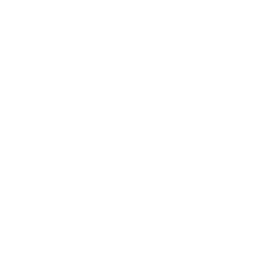

len = 156


(('P',), [255, 255, 255], [(65536, 0)])

In [ ]:
(_, _, _, mywhite_d) = next(M.get_all_tiles(mbtw1, q='WHERE zoom_level = 9'))
display(IImage(mywhite_d))
print('len =', len(mywhite_d))
im = PIL.Image.open(io.BytesIO(mywhite_d))
im.getbands(), im.getpalette(), im.getcolors(256**2)


60 : 13 4224 5270 156


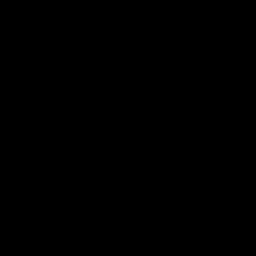

In [ ]:
for i, (z, x, y, imd) in enumerate(M.get_all_tiles(mbtw1, q='WHERE zoom_level>10'), start=1):
    if 150 <= len(imd) < 160:
        print (i, ':', z, x, y, len(imd))
        break
display(IImage(imd))
T = 0.98
im = PIL.Image.open(io.BytesIO(imd))
colors = im.getcolors(256**2)
nbw = 0
for n, c in colors:
    if c in ((255,255,255),(0,0,0)):
        nbw += n
nbw, T * 256**2, nbw > T * 256**2

110 : 13 4225 5253 12155


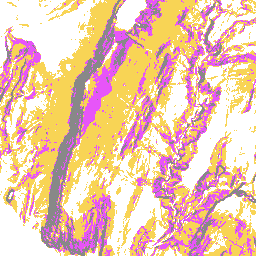

(('P',),
 [255, 255, 255, 248, 212, 85, 231, 85, 248, 136, 136, 136],
 [(23177, 0), (25740, 1), (10701, 2), (5918, 3)])

In [ ]:
for i, (z, x, y, imd) in enumerate(M.get_all_tiles(mbtw1, q='WHERE zoom_level>10'), start=1):
    if 10000 <= len(imd):
        print (i, ':', z, x, y, len(imd))
        break
display(IImage(imd))
im = PIL.Image.open(io.BytesIO(imd))
im.getbands(), im.getpalette(),  im.getcolors(256**2)

60409 : 15 17024 21183 45372


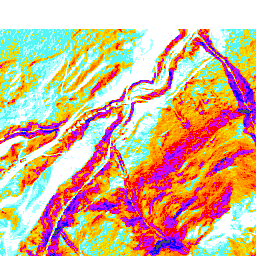

(('R', 'G', 'B', 'A'),
 [(8876, (255, 255, 255, 255)),
  (6682, (170, 255, 255, 255)),
  (7840, (86, 245, 245, 255)),
  (131, (77, 77, 77, 255)),
  (1933, (167, 25, 255, 255)),
  (3349, (220, 0, 245, 255)),
  (1345, (110, 0, 255, 255)),
  (496, (0, 0, 255, 255)),
  (5732, (240, 225, 0, 255)),
  (5632, (245, 191, 0, 255)),
  (5809, (255, 155, 0, 255)),
  (5489, (255, 105, 0, 255)),
  (4798, (255, 0, 0, 255)),
  (7424, (0, 0, 0, 0))])

In [ ]:
for i, (z, x, y, imd) in enumerate(M.get_all_tiles(mbtw1, q='WHERE zoom_level>10'), start=1):
    if 40000 <= len(imd):
        print (i, ':', z, x, y, len(imd))
        break
display(IImage(imd))
im = PIL.Image.open(io.BytesIO(imd))
im.getbands(), im.getcolors(256**2)

In [ ]:
im.format, im.getbands()

('PNG', ('R', 'G', 'B', 'A'))

In [ ]:
with open('a.png', 'wb') as f:
    f.write(imd)

!ls -l a.png

-rw-rw-r-- 1 me me 45372 févr.  7 21:31 a.png


In [ ]:
!pngquant a.png
!ls -l a*.png

-rw-rw-r-- 1 me me 19472 févr.  7 21:33 a-fs8.png
-rw-rw-r-- 1 me me 45372 févr.  7 21:31 a.png


In [ ]:
imq = im = PIL.Image.open(io.BytesIO(open('a-fs8.png', 'rb').read()))
im.getbands(), ' '.join(map(str, im.getpalette())), im.getcolors(256**2)

(('P',),
 '71 112 76 245 191 0 255 255 255 170 255 255 255 105 0 255 0 0 255 155 0 240 225 0 86 245 245 220 0 245 167 25 255 110 0 255 0 0 255 77 77 77',
 [(7424, 0),
  (5632, 1),
  (8876, 2),
  (6682, 3),
  (5489, 4),
  (4798, 5),
  (5809, 6),
  (5732, 7),
  (7840, 8),
  (3349, 9),
  (1933, 10),
  (1345, 11),
  (496, 12),
  (131, 13)])

In [ ]:
from collections import defaultdict
import io
import os
import shutil
import sqlite3
import time

import PIL, PIL.Image

from src import mbt_util as M
import img_util as G
from mbt_download import catchtime


def clean_black_white_tiles(mbt: str, *, T=0.99, zlevels:tuple=(), debug=True):
    """Clean file in place.

    It uses the following heuristics, valid only for jpeg tiles as png will have less colors
    * Tile size < 4000 bytes (encoded) or with less than 300 different colors is empty
    * Otherwise count pure black + pure white pixels, X
    * X < 10% of pixels: empty
    * 10% < X < 80%: partial
    Based on this:
    * Empty tiles are discarded
    * Partial tiles are moved to a dedicated mbtiles for later use (ie possibly merge with other tilesets :-))
    Typical values for IGN w=0.1, T=192|255 ; for swisstopo w=0.04, T=96
    To disable partial handling, use w=T=0
    """
    debug = print if debug else lambda x: None
    assert mbt.endswith('.mbtiles')
    newmbt = mbt[:-8] + '-clean.mbtiles'
    if os.path.exists(newmbt):
        os.rename(newmbt, mbt[:-8] + str(round(time.time())) + '-clean.mbtiles')
    shutil.copyfile(mbt, newmbt)
    mbt = newmbt
    zxy_to_remove = []
    reasons = defaultdict(int)
    db = sqlite3.connect(mbt, isolation_level="DEFERRED")
    delcur = db.cursor()
    # Prepare partial tiles db
    ntiles = M.tile_count(delcur)
    q = '' if not zlevels else f'WHERE zoom_level IN {zlevels}'

    lengths_d = {}
    lengths_k = {}
    PIXELS = 256**2
    for i, (z, x, y, imd) in enumerate(M.get_all_tiles(db, q=q), start=1):
        if i % 2000 == 1:
            M.remove_tiles(delcur, zxy_to_remove)
            print(f'Deleted {len(zxy_to_remove)}. Status: {i-1} / {ntiles}')
            zxy_to_remove = []
        im = PIL.Image.open(io.BytesIO(imd))
        reason = ''
        N = min(len(imd), 4000) // 10 * 10
        # if len(imd) < 4000:
        #     reason += 'small'
        #     zxy_to_remove.append((z, x, y))
        # else:
        plt = im.getpalette()
        if plt and len(plt) == 3:
            reason += 'monochrome'
            zxy_to_remove.append((z, x, y))
            lengths_d[N] = lengths_d.get(N, 0) + 1
        # colors = im.getcolors(256**2)
        # nbw = 0
        # for n, c in colors:
        #     if c in ((255,255,255),(0,0,0)):
        #         nbw += n
        # if nbw > T * PIXELS:
        #     reason += 'tooblackorwhite'
        #     zxy_to_remove.append((z, x, y))
        #     lengths_d[N] = lengths_d.get(N, 0) + 1
        # else:
        #     lengths_k[N] = lengths_k.get(N, 0) + 1

        reasons[(z, reason)] += 1
    M.remove_tiles(delcur, zxy_to_remove)
    print(f'Deleted {len(zxy_to_remove)}. Status: done!')
    db.commit()
    return mbt, reasons, lengths_k, lengths_d

mbt, reason, lengths_k, lengths_d = clean_black_white_tiles(mbtw1, T=0.98, zlevels=(13,14,15,16))
mbt, reason, lengths_k, lengths_d

Deleted 0. Status: 0 / 330208
Deleted 174. Status: 2000 / 330208
Deleted 236. Status: 4000 / 330208
Deleted 588. Status: 6000 / 330208
Deleted 177. Status: 8000 / 330208
Deleted 66. Status: 10000 / 330208
Deleted 66. Status: 12000 / 330208
Deleted 23. Status: 14000 / 330208
Deleted 0. Status: 16000 / 330208
Deleted 494. Status: 18000 / 330208
Deleted 533. Status: 20000 / 330208
Deleted 793. Status: 22000 / 330208
Deleted 666. Status: 24000 / 330208
Deleted 489. Status: 26000 / 330208
Deleted 417. Status: 28000 / 330208
Deleted 375. Status: 30000 / 330208
Deleted 276. Status: 32000 / 330208
Deleted 73. Status: 34000 / 330208
Deleted 61. Status: 36000 / 330208
Deleted 67. Status: 38000 / 330208
Deleted 97. Status: 40000 / 330208
Deleted 99. Status: 42000 / 330208
Deleted 78. Status: 44000 / 330208
Deleted 90. Status: 46000 / 330208
Deleted 81. Status: 48000 / 330208
Deleted 71. Status: 50000 / 330208
Deleted 56. Status: 52000 / 330208
Deleted 54. Status: 54000 / 330208
Deleted 34. Status

('../../mapdata/mbtiles/eslo/esloAlpsW1-clean.mbtiles',
 defaultdict(int,
             {(13, 'tooblackorwhite'): 408,
              (14, 'tooblackorwhite'): 1822,
              (15, 'tooblackorwhite'): 7859,
              (16, 'tooblackorwhite'): 37446}),
 {},
 {150: 47535})

In [ ]:
for i in sorted(lengths_k):
    print(i, lengths_k[i])

150 47535
160 75
170 596
180 569
190 510
200 464
210 409
220 435
230 396
240 359
250 369
260 352
270 370
280 308
290 359
300 297
310 317
320 317
330 308
340 279
350 284
360 330
370 270
380 252
390 266
400 262
410 262
420 298
430 252
440 276
450 198
460 252
470 248
480 251
490 234
500 239
510 223
520 217
530 234
540 245
550 221
560 223
570 256
580 224
590 209
600 245
610 249
620 223
630 245
640 214
650 238
660 230
670 194
680 242
690 188
700 239
710 225
720 249
730 255
740 316
750 217
760 240
770 260
780 230
790 230
800 256
810 222
820 239
830 231
840 238
850 687
860 233
870 231
880 234
890 225
900 233
910 189
920 236
930 207
940 252
950 214
960 222
970 219
980 242
990 233
1000 244
1010 225
1020 218
1030 230
1040 241
1050 225
1060 221
1070 244
1080 202
1090 238
1100 226
1110 232
1120 210
1130 241
1140 237
1150 203
1160 230
1170 229
1180 243
1190 221
1200 237
1210 251
1220 213
1230 205
1240 228
1250 243
1260 233
1270 240
1280 235
1290 231
1300 218
1310 255
1320 241
1330 215
1340 230
1350

In [ ]:
mbt, reason, lengths_k, lengths_d = clean_black_white_tiles(mbtw, T=0.98, zlevels=(13,14,15,16))


In [ ]:
import inspect
from itertools import islice
import io
from math import ceil
# from multiprocessing import Pool
import os
import subprocess
import sys

import sqlite3


"""
! needs pngnq 1.1 for overwrite.  see https://sourceforge.net/p/pngnq/bugs/6/
to address this pngnq-s9 has been installed thus:

```
git clone https://github.com/ImageProcessing-ElectronicPublications/pngnq-s9
cd pngnq-s9
./configure CFLAGS="-O3 -msse -funroll-loops"
sed -i 's/automake-1.15/automake-1.16/g' Makefile
aclocal
sudo make install
```
"""

def split_in_n(lst, n):
    """ also https://more-itertools.readthedocs.io/en/latest/api.html#more_itertools.divide """
    it = iter(lst)
    return (list(islice(it, n)) for i in range(int(len(lst)/n)))


def sum_size(paths):
    return sum(os.stat(path).st_size for path in paths)


def mbt_compress(conn, dst_conn, tilefolder, zlevels=[]):
    # dest = mbtpath.replace('.mbtiles', '-compressed.mbtiles')
    # assert not os.path.exists(dest), 'Not overwriting ' + dest
    # tmp dir:
    os.makedirs(tilefolder, exist_ok=True)

    ntiles = conn.execute("SELECT COUNT(*) FROM tiles WHERE zoom_level>=15;").fetchone()[0]
    print('Processing', ntiles, 'tiles')

    c_select = conn.cursor()
    c_select.execute(f"""SELECT zoom_level, tile_column, tile_row, tile_data FROM tiles
    WHERE zoom_level>=15
    """)
    nprocessed = 0
    nskipped = 0

    N_TILES_BATCH = 1000
    N_SHELL_PROCESSES = 8
    SECONDS_PER_TILE_TIMEOUT = 0.5
    while True:  # batch
        paths = {}
        size_before = 0
        stop = True

        for zoom_level, tile_column, tile_row, tile_data in islice(c_select, N_TILES_BATCH):
            stop = False
            tile_path = f"{tilefolder}/{zoom_level}-{tile_column}-{tile_row}.png"
            if len(tile_data) > 10000:
                with io.open(tile_path, 'wb') as f:
                    f.write(tile_data)
                paths[tile_path] = (zoom_level, tile_column, tile_row, os.stat(tile_path).st_size)
                size_before += os.stat(tile_path).st_size
            else:
                nskipped += 1
        # sizes = [os.stat(tile_path).st_size]

        if stop:
            break
        if not paths:
            continue

        # size = up to N_TILES_BATCH, split amongst cpus
        shell_batch_size = ceil(len(paths) / N_SHELL_PROCESSES)
        timeout = SECONDS_PER_TILE_TIMEOUT * shell_batch_size

        compress_cmds = [
            'pngquant --speed 9 --ext .png --force'.split()
            # 'pngnq-s9 -f -e .png'.split(),
            # 'optipng -q -o1 -zc9 -zm8 -zs3 -f4'.split()
        ]
        sizes = [sum_size(paths)]
        for cmd in compress_cmds:
            # path_list = list(paths.keys())
            # cmd.extend(path_list)
            # subprocess.check_call(cmd)
            threads: list[subprocess.Popen] = []
            path_it = iter(paths)
            for _ in range(N_SHELL_PROCESSES):
                path_batch = list(islice(path_it, shell_batch_size))
                if path_batch:  # not at the very end
                    threads.append(subprocess.Popen(cmd + path_batch))

            for x in threads:
                try:
                    retcode = x.wait(timeout=timeout)
                    if retcode:
                        raise subprocess.CalledProcessError(retcode, cmd)
                except subprocess.TimeoutExpired:
                    print(x.args)
                    print(f'Timeout after {timeout} seconds')

            # print('Size after step ', i, ':', sum(os.stat(tile_path).st_size for tile_path in paths))
            sizes.append(sum_size(paths))

        def row_iter():
            for tile_path in paths:
                zoom_level, tile_column, tile_row, old_size = paths[tile_path]
                if not os.stat(tile_path).st_size >= old_size:
                    with open(tile_path, 'rb') as f:
                        yield (f.read(), zoom_level, tile_column, tile_row)

        if conn != dst_conn:
            query = """INSERT INTO tiles (tile_data, zoom_level, tile_column, tile_row) VALUES (?,?,?,?)
                ON CONFLICT (zoom_level, tile_column, tile_row) DO UPDATE SET tile_data=excluded.tile_data"""
        else:
            query = "UPDATE tiles SET tile_data=? WHERE zoom_level=? AND tile_column=? AND tile_row=?"
        n_updated = dst_conn.executemany(query, row_iter()).rowcount
        dst_conn.commit()

        nprocessed += len(paths)
        print('Sizes', '->'.join(map(str,sizes)),
              '; Skipped: ', nskipped,
              '; Updated: ', n_updated,
              f'; Progress: +{len(paths)}: {nskipped}+{nprocessed}/{ntiles}',
                int(100*(nprocessed+nskipped)/ntiles), '%')

        for tile_path in paths:
            os.remove(tile_path)  # (keep files until inserted correctly)

    conn.close()



In [ ]:
!python3 ~/TIL/geo/src/mbtidime/mbtcompress.py $mbt $mbtwq

Processing 305972 tiles
Sizes 875912->837059 ; Skipped:  932 ; Updated:  68 ; Progress: +68: 932+68/305972 0 %
Sizes 973662->937195 ; Skipped:  1857 ; Updated:  75 ; Progress: +75: 1857+143/305972 0 %
Sizes 826472->783506 ; Skipped:  2788 ; Updated:  69 ; Progress: +69: 2788+212/305972 0 %
Sizes 716487->684276 ; Skipped:  3728 ; Updated:  60 ; Progress: +60: 3728+272/305972 1 %
Sizes 2164003->2077091 ; Skipped:  4557 ; Updated:  171 ; Progress: +171: 4557+443/305972 1 %
Sizes 3054499->2939726 ; Skipped:  5329 ; Updated:  228 ; Progress: +228: 5329+671/305972 1 %
Sizes 2189335->2099060 ; Skipped:  6158 ; Updated:  171 ; Progress: +171: 6158+842/305972 2 %
Sizes 1976893->1906122 ; Skipped:  7000 ; Updated:  158 ; Progress: +158: 7000+1000/305972 2 %
Sizes 1908826->1847142 ; Skipped:  7847 ; Updated:  153 ; Progress: +153: 7847+1153/305972 2 %
Sizes 1692294->1634107 ; Skipped:  8705 ; Updated:  142 ; Progress: +142: 8705+1295/305972 3 %
Sizes 2273664->2190557 ; Skipped:  9519 ; Updated:  

In [ ]:
mbtwf = mbtfold + 'esloAlpsW.mbtiles'
M.mbt_merge(mbt, mbtwq, dest=mbtwf)

cp ../../slope-ign-alti/alpsc/esloAlpsW-clean.mbtiles ../../mapdata/mbtiles/eslo/esloAlpsW.mbtiles
<<>> ../../slope-ign-alti/alpsc/esloAlpsW-clean : zoom = 9 16 ; n = 325955 * 7 kb/tile ; bounds = 5.625,43.58039,6.32813,45.08904 ; center = 5.97656,44.33471,9 ; format = png ; name = alps/esloAlpsW
<< ../../mapdata/mbtiles/eslo/esloAlpsWq : zoom = 15 16 ; n = 68756 * 16 kb/tile ; name = alps/esloAlpsW ; format = png ; bounds = 5.625,43.58039,6.32813,45.08904 ; center = 5.97656,44.33471,9
>> ../../mapdata/mbtiles/eslo/esloAlpsW : zoom = 9 16 ; n = 325955 ; bounds = 5.625,43.58039,6.32813,45.08904 ; center = 5.97656,44.33471,9 ; format = png ; name = alps/esloAlpsW
Meta update {'bounds': '5.625,43.58039,7.73438,46.55886',
 'center': '6.67969,45.06963,9',
 'maxzoom': 16,
 'minzoom': 9,
 'type': 'baselayer'}
Created: ../../mapdata/mbtiles/eslo/esloAlpsW


In [ ]:
M.cut_to_lnglat(mbtwf, bb=GY.bbsalp[1], dest=mbtw1)



zoom = 9 16 ; n = 325955 * 7 kb/tile ; bounds = 5.625,43.58039,7.73438,46.55886 ; center = 6.67969,45.06963,9 ; format = png ; name = ../../mapdata/mbtiles/eslo/esloAlpsW
cut_to_lnglat ../../mapdata/mbtiles/eslo/esloAlpsW.mbtiles -> ../../mapdata/mbtiles/eslo/esloAlpsW1.mbtiles
9 16 16
z 9: +18 tiles: 264<x<266 325<y<330
z10: no tiles, skipping
z11: no tiles, skipping
z12: no tiles, skipping
z 13: +3672 tiles: 4224<x<4271 5211<y<5295
z 14: +14397 tiles: 8448<x<8543 10423<y<10591
z 15: +56816 tiles: 16896<x<17087 20847<y<21183
z 16: +220256 tiles: 33792<x<34175 41695<y<42367
Meta update {'bounds': '5.625,43.58039,7.73438,46.55886',
 'center': '6.67969,45.06963,9',
 'maxzoom': 16,
 'minzoom': 9,
 'type': 'baselayer'}


In [ ]:
bb_nw_of_annecy_to_delete = bbox.snap_to_xyz(GY.LLBb(
    GY.lng56z6_grenoble_auriol, 45.8, 6.1, GY.lat65z9_lausanne_smoritz_bolzano
    ), z=11)
bb_nw_of_annecy_to_delete = bbox.enlarge(bb_nw_of_annecy_to_delete , eps=-0.001)
bb_nw_of_annecy_to_delete


LngLatBbox(west=5.626, south=45.82979925192134, east=6.15134375, north=46.55786030311718)

In [ ]:
M.remove_lnglat(mbtw1, bb=bb_nw_of_annecy_to_delete, zmin=13, overwrite=True)  # at z9 we keep white tiles


<<>> ../../mapdata/mbtiles/eslo/esloAlpsW1 : zoom = 9 16 ; n = 289016 * 7 kb/tile ; bounds = 5.625,43.58039,7.73438,46.55886 ; center = 6.67969,45.06963,9 ; format = png ; name = ../../mapdata/mbtiles/eslo/esloAlpsW
13 16 16
z 13 : removed 21
z 14 : removed 105
z 15 : removed 460
z 16 : removed 1683
Meta update {'bounds': '5.625,43.58039,7.73438,46.55886',
 'center': '6.67969,45.06963,9',
 'maxzoom': 16,
 'minzoom': 9,
 'type': 'baselayer'}
